# Ensemble Learning

**1. Can we use Bagging for regression problems?**
- Yes, bagging can be used for regression problems. Bagging, or bootstrap aggregation, is an ensemble method designed to reduce overfitting and improve prediction accuracy by training multiple base models on different bootstrapped samples of the data. For regression tasks, each base model (often a regression tree, but any regressor can be used) is trained independently on these samples, and their predictions are averaged to form the final prediction.

**2. What is the difference between multiple model training and single model training?**
- The difference between single model training and multiple model training lies at the heart of how predictive models are constructed and how they learn from data. In single model training, all efforts are focused on building one model that attempts to encapsulate all relevant data patterns. This approach is straightforward, making it an attractive option for those seeking clarity and ease of interpretation. Because only a **single model** is used, the **computational demands are typically low**, and the process from training to deployment is generally faster and simpler to manage. However, relying solely on one model means the predictions are inherently tied to the limitations of that individual learner—if the model is too simple, it may **fail to capture complex relationships** (underfitting), while if it is too complex, it risks fitting idiosyncrasies of the training data that do not generalize (overfitting).

  In contrast, multiple model training, also referred to as ensemble learning, draws upon the collective wisdom of several models. Each model in the ensemble might be trained using different subsets of the data, with varied initialization parameters, or even entirely distinct algorithms. The primary intuition is that where one model may mistake noise for a significant signal, another might see through this, and by pooling their judgments—through techniques like averaging in regression or majority voting in classification—ensemble methods often **outperform their single-model** counterparts. While ensemble techniques demand **more computational resources** and entail greater complexity in both implementation and interpretation, they grant robustness and resilience to prediction tasks, as the strengths of individual models compensate for each other's weaknesses, leading to improved accuracy and generalization.

  The choice between single and multiple model training reflects a trade-off. Single models bring efficiency and transparency, offering solutions that are more accessible and easier to explain. Ensembles, meanwhile, grant superior performance and stability, especially crucial in high-stakes predictive tasks or when seeking to wring the most from complex, noisy data. Each approach has its suitable context, and understanding these underlying philosophies allows practitioners to tailor their methods to the demands and constraints of the problem at hand.

**3. Explain the concept of feature randomness in Random Forest.**
- Feature randomness in Random Forest means that, when building each decision tree in the forest, the algorithm doesn't look at all the available features (or columns) every time it has to decide how to split the data. Instead, it picks a smaller, random subset of features each time it needs to make a split. This means each tree learns differently because it might focus on different features or combinations of features, even if they're all using the same data. The main reason for this is to make sure the trees are different from each other, so they don’t all make the same mistakes. When the final prediction is made, the Random Forest combines the results from all these different trees, which helps make the answer more accurate and less likely to be wrong or overfit to the training data. Simply put, feature randomness helps Random Forest models be smarter and more reliable by making sure the trees inside the forest are not all thinking alike.

**4. What is OOB (Out-of-Bag) Score?**
- The Out-of-Bag (OOB) Score is a built-in performance measure used in ensemble models like Random Forests that rely on bagging. When a Random Forest is trained, each individual tree is built using a random subset of the original dataset, created via sampling with replacement (called a bootstrap sample). Consequently, about one-third of the training data is not used in building each specific tree—these unused samples are known as the out-of-bag samples for that tree.

**5. How can you measure the importance of features in a Random Forest model?**
- You can measure the importance of features in a Random Forest model using several well-established methods that provide insight into which variables have the most influence on your model's predictions. The most common approach, and the one built into popular libraries like scikit-learn, is known as impurity-based feature importance or Mean Decrease in Impurity (MDI). This method works by analyzing how each feature contributes to reducing impurity—such as Gini impurity for classification or variance for regression—in every split across all trees in the forest. Each time a feature is used to split a node, the impurity reduction is recorded and then summed, with the results averaged and normalized across all trees. Features that consistently create strong splits—in other words, those that most help the model distinguish or explain the target variable—receive higher scores. This value can be accessed directly from the fitted model using the feature_importances_ attribute in scikit-learn.

  Another technique is permutation feature importance, which is model-agnostic and works by measuring the increase in the model’s prediction error after randomly shuffling the values of a feature. By breaking the relationship between the feature and the true outcome, you can observe how much the model's accuracy suffers—features whose permutation leads to a strong decline in performance are considered more important. This approach is particularly useful for identifying features whose predictive value may not be fully captured by the impurity-based method and for countering biases toward variables with more levels or possible splits.

**6. Explain the working principle of a Bagging Classifier.**
- A Bagging Classifier (short for Bootstrap Aggregating Classifier) is an ensemble learning method designed to improve the accuracy and robustness of machine learning models, particularly those prone to high variance such as decision trees. The working principle starts by generating multiple different subsets of the original training data through a process called bootstrap sampling. In this process, each subset is created by randomly selecting samples from the dataset with replacement, which means that some data points may appear more than once in a subset while others may not appear at all.

  For each of these bootstrapped subsets, a separate base classifier—often called a "weak learner"—is independently trained. These base classifiers work in parallel and are exposed to slightly different data distributions, leading them to learn different patterns or make different errors. Once all base classifiers have been trained, the Bagging Classifier makes predictions on new, unseen data by aggregating the outputs from each base model. In classification tasks, this aggregation is typically done via majority voting, where the class label predicted most often by the base classifiers becomes the final output of the ensemble. This approach leverages the collective “wisdom” of multiple models, reducing the likelihood that the ensemble will overfit to peculiarities in the training data.

  An additional strength of the Bagging Classifier is its ability to use so-called out-of-bag (OOB) samples—the data points not included in a particular tree’s bootstrap sample—to measure the model’s performance without needing a separate validation set. Overall, Bagging vastly improves model performance by reducing variance, boosting prediction stability, and decreasing the risk of overfitting, thereby producing more reliable and accurate results than any single model alone.

**7. How do you evaluate a Bagging Classifier’s performance?**
- You can evaluate the performance of a Bagging Classifier using several standard approaches, each reflecting different aspects of model accuracy and generalization.

  The most direct method is to assess the classifier's accuracy, precision, recall, F1-score, or other classification metrics on a separate test set. After you train the Bagging Classifier on your training data, you make predictions on your test data and calculate these metrics. This provides a clear, quantitative measure of how well your ensemble model is performing on data it has not seen before.

  Another valuable and efficient metric unique to bagging (and Random Forests) is the Out-of-Bag (OOB) score. Because each base learner in a Bagging Classifier is trained on a bootstrap sample—a random subset of the training data with replacement—some samples are not used for that particular model. The OOB score is calculated by aggregating the predictions for each sample across all the models where it was not included in the training subset. This provides an unbiased estimate of the model’s performance without needing a separate validation set, saving both data and computational resources, especially on smaller datasets.

**8. How does a Bagging Regressor work?**
- A Bagging Regressor works by creating an ensemble of several regression models—often called “base learners”—to improve prediction accuracy and reduce overfitting, especially for models that are sensitive to variations in the data, like decision trees. Its key steps are as follows:

  **Bootstrap Sampling:** The Bagging Regressor generates multiple random subsets of the training data by sampling with replacement, a process known as bootstrapping. Each subset, called a bootstrap sample, might include some data points multiple times and miss others completely. This means each base regressor sees a slightly different view of the data, encouraging model diversity.

  **Base Model Training:** For each bootstrap sample, a separate regression model (such as a Decision Tree Regressor) is trained independently. This parallel training allows each model to capture different aspects of the dataset and the underlying patterns, making the ensemble less likely to overfit compared to a single model.

  **Prediction Aggregation:** When making predictions, the Bagging Regressor gathers the outputs from all the trained base models and typically averages them. In regression tasks, averaging the predictions helps to “smooth out” any errors made by individual models, leading to more stable and accurate results.


**9. What is the main advantage of ensemble techniques?**
- The main advantage of ensemble techniques is their ability to significantly improve prediction accuracy and robustness by combining the strengths of multiple models rather than relying on a single one. When different models are trained on the same or slightly varied data, they are likely to capture different aspects of the underlying patterns and make diverse errors. By aggregating their predictions—through methods like voting (for classification) or averaging (for regression)—ensemble methods can produce results that are more accurate, stable, and generalize better to new data than any individual model alone.

  Ensemble techniques also reduce overfitting by mitigating the risk that the model memorizes noise or peculiarities in the training data, a common issue with single complex models. They are particularly effective at handling noisy data and outliers, as the influence of any one misjudgment is diluted by the consensus of the group. Additionally, ensembles help balance bias and variance, strike a better trade-off between overfitting and underfitting, and deliver more reliable predictions in real-world scenarios—even when using relatively weak or simple base models. This is why ensemble methods such as bagging, boosting, and stacking are widely adopted in high-stakes applications, powering systems like search engines, recommendation systems, and fraud detection platforms.

**10. What is the main challenge of ensemble methods?**
- The main challenge of ensemble methods is their **increased complexity**, both in terms of computational resources and interpretability. Because ensembles combine multiple models—sometimes dozens, hundreds, or even thousands—they inherently require more computational power for training and making predictions compared to using a single model. This can lead to longer training times, higher memory consumption, and greater demands when deploying the model into production.

  Beyond computation, another significant challenge is **interpretability**. Ensemble models, by their very nature, function as "black boxes," making it difficult to understand the reasoning behind specific predictions. Unlike single, simple models where insights can be directly gleaned from model parameters or decision paths, ensembles aggregate the outputs of many different models, obscuring the influence of any single feature or training example. This lack of transparency can be a problem in fields where understanding the decision process is crucial, such as finance, healthcare, or situations requiring regulatory compliance.

  Additional challenges include the **risk of overfitting** if the base learners are not properly regularized, and the need for careful management of model diversity to ensure that ensemble members do not all make similar errors. Tuning ensemble methods also generally involves more hyperparameters, further complicating the modeling pipeline and requiring more sophisticated validation techniques. Thus, while ensemble methods excel in boosting performance and robustness, they do so at the cost of added computational, operational, and interpretability challenges.

**11. Explain the key idea behind ensemble techniques.**
- The key idea behind ensemble techniques is to combine the predictions of multiple models to achieve better accuracy and robustness than any single model could provide on its own. Instead of relying on one model, which might capture some patterns but also be prone to specific errors or overfitting, ensemble methods create a group of models—often trained in slightly different ways or on different subsets of the data. By aggregating their outputs, either through voting (in classification) or averaging (in regression), ensemble techniques harness the collective “wisdom” of the group.

  This strategy reduces the risk that all models will make the same mistakes or be equally misled by noise in the data. As a result, the overall prediction becomes more reliable, less sensitive to fluctuations in the data, and often achieves higher performance on unseen samples. Ensembling is a powerful way to address the limitations of individual models and build systems that generalize better—making it a fundamental tool in modern machine learning.

**12. What is a Random Forest Classifier?**
- A Random Forest Classifier is a widely used machine learning algorithm designed for classification tasks. It works by building an ensemble (or "forest") of multiple decision trees, each trained on different random subsets of the data and considering different random subsets of features at each split. This introduction of randomness ensures that each tree in the forest is unique, reducing the likelihood that they all make the same mistakes, and significantly improves the model's ability to generalize to unseen data.

  During training, each decision tree in the forest learns to classify data points based on patterns it finds in its own randomized training subset. When the Random Forest Classifier is used to make a prediction, each tree independently predicts a class, and the final classification is determined by majority voting: the class that receives the most votes across all trees is chosen as the output.

  The main advantages of a Random Forest Classifier include its high accuracy, robustness to overfitting, and its ability to handle large and complex datasets with many features. It also naturally provides insights into feature importance, helping identify which variables are most influential in predictions. Because it is an ensemble method, Random Forest often performs better than individual decision trees, which can easily overfit the training data.

  > A Random Forest Classifier combines the strengths of multiple decision trees, leveraging their diverse perspectives to make more accurate and reliable predictions for classification problems.

**13. What are the main types of ensemble techniques?**
- The main types of ensemble techniques in machine learning are bagging, boosting, and stacking.

  **Bagging** (Bootstrap Aggregating) constructs multiple models independently by training each one on a different random subset of the training data created using bootstrapping (sampling with replacement). Their individual predictions are then combined—usually by majority voting for classification or averaging for regression—to produce the final output. The primary goal of bagging is to reduce variance and prevent overfitting; Random Forest is a classic example of this approach.

  **Boosting** creates models sequentially, where each new model is trained to correct the errors made by the previous ones. Each model pays more attention to the misclassified or poorly predicted examples of the earlier models, and their predictions are combined , typically through weighted voting or weighted averaging. Boosting aims to reduce both bias and variance and can lead to highly accurate models. Popular algorithms include AdaBoost, Gradient Boosting, and XGBoost.

  **Stacking** (Stacked Generalization) goes a step further by training multiple different base models (often of various types), then building a meta-model that learns how best to combine the predictions of these base models. The meta-model is trained on the output predictions of the base learners, allowing the ensemble to capture relationships among their outputs for improved performance.

**14. What is ensemble learning in machine learning?**
- Ensemble learning in machine learning is a technique where multiple models—often referred to as “learners” or “base models”—are trained to solve the same problem, and their predictions are combined to achieve better performance than any single model alone. The core idea is similar to seeking advice from a group of people: while individual opinions may be limited or prone to error, collectively they tend to produce a more accurate and reliable result.

  Ensemble models work by aggregating the strengths and compensating for the weaknesses of individual models. This approach enhances predictive accuracy, reduces both bias and variance, and increases the overall robustness and generalization ability of machine learning systems. As a result, ensemble learning is frequently used to combat issues like overfitting, high variance, or the insufficient performance of individual models, especially when dealing with complex or noisy datasets.

  There are several common types of ensemble techniques, including bagging (where models are trained independently on different random subsets of the data), boosting (where models are trained sequentially, each focusing on correcting the errors of its predecessor), and stacking (where predictions from multiple different models are combined by a meta-model). These methods have been successfully applied across various machine learning tasks, including classification, regression, and anomaly detection, and are key to building high-performance, reliable predictive systems in real-world applications.

**15. When should we avoid using ensemble methods?**
- Ensemble methods, while powerful, are not always the best choice for every situation. It's important to avoid using ensemble methods under certain conditions:

  **When interpretability is crucial:** Ensemble models (like Random Forests or stacked classifiers) combine the predictions of many models, making them complex and often considered “black boxes.” If your application requires clear explanations for predictions, such as in healthcare or finance where transparency is needed for regulatory or ethical reasons, single, simpler models (like logistic regression or decision trees) are preferable.

  **With limited computational resources:** Ensembles typically demand more memory, processing power, and longer training and prediction times because multiple models are involved. When working with very large datasets or in environments with strict resource constraints (like embedded systems or real-time applications), a single, efficient model may be more appropriate.

  **For small or simple datasets:** When the dataset is small or the underlying relationship is not complex, ensemble methods can easily overfit. In these cases, ensembles may not offer significant performance improvements over single models and can even increase the risk of capturing noise in the data.

  **If the base model already performs optimally:** Sometimes, a well-tuned single model captures the patterns in the data almost as well as possible. Introducing an ensemble might add unnecessary complexity without yielding substantial performance gains.

  **During rapid prototyping or experimentation:** The increased training time, complexity, and resource usage of ensembles make them less desirable when quick, iterative development is needed. Simple models enable faster experimentation and can reveal insights about data features more quickly.

  **When deployment constraints exist:** Deploying multiple models increases maintenance complexity and can complicate pipelines, especially in low-latency or resource-limited production environments. Simpler solutions are often easier to maintain, update, and troubleshoot.

  > *In summary*, ensemble methods are best reserved for tasks where performance is paramount, and the additional complexity is justified by significant gains in accuracy or robustness. When transparency, efficiency, or simplicity is the focus, or when working with limited data, ensembles should generally be avoided.

**16. How does Bagging help in reducing overfitting?**
- Bagging helps reduce overfitting by making predictions less sensitive to the specific training data on which each base model is trained. In a single complex model, particularly those that are unstable (like deep decision trees), there’s a high risk that the model will “memorize” noise or peculiarities in the training set—this is overfitting, and it leads to poor generalization on new, unseen data.

  **Bagging (Bootstrap Aggregating) confronts this challenge through two related mechanisms:**

  **First**, by creating multiple bootstrapped samples—each a slightly different version of the original dataset, sampled with replacement—it ensures that each base model (such as an individual decision tree in the ensemble) is exposed to its own unique subset of the training data. As a result, the models make diverse patterns of mistakes, and their individual overfitting tendencies do not coincide.

  **Second**, after all base models are trained, Bagging aggregates their predictions (by averaging for regression or majority voting for classification). This aggregation smooths out the idiosyncratic errors any one model might make, diluting the effects of overfitting that stem from individual trees “memorizing” noise in their samples. By combining the outputs of multiple diverse learners, Bagging produces a final prediction that is more robust, stable, and generalizes better to new data.

**17. Why is Random Forest better than a single Decision Tree?**
- Random Forest is generally better than a single Decision Tree because it combines the strengths of many trees to produce more accurate, robust, and generalizable predictions. While a single decision tree learns patterns from the training data and can make fast, interpretable predictions, it is also very sensitive to the data it was trained on. This means that even small changes in the dataset can lead to very different tree structures—resulting in high variance and an increased risk of overfitting, especially when the tree is deep or the data is noisy.

  Random Forest addresses these weaknesses by creating an ensemble of many decision trees, each trained on a slightly different random subset of the data (using bootstrap sampling) and, at every split, considering a random subset of features rather than all available features. This process introduces diversity among the trees—each one is likely to capture different patterns or make different mistakes. When the Random Forest makes a prediction, it aggregates the results from all the trees (using majority voting for classification or averaging for regression), effectively smoothing out the quirks or errors of individual trees.

  **The key benefits of Random Forest over a single decision tree are:**

  **Higher accuracy and stability:** The collective judgment of many trees averages out individual errors and variances, leading to better overall performance on unseen data.

  **Reduced overfitting:** By leveraging randomness in data and features, the Random Forest mitigates the risk that the ensemble will memorize noise or peculiarities of the training set, a common issue with single deep trees.

  **Robustness to noise and outliers:** Outlier data points are less likely to distort the ensemble's prediction because their influence is spread out across multiple trees.

  **Automatic feature selection:** The random selection of features at each split helps the model discover and use the most informative variables, while also reducing the dominance of strong predictors that might otherwise suppress weaker, but still useful, features.

**18. What is the role of bootstrap sampling in Bagging**
- Bootstrap sampling plays a central role in Bagging (Bootstrap Aggregation) by generating multiple diverse training datasets from the original data through random sampling with replacement. Each of these bootstrap samples is used to train a separate model (often called a base learner), ensuring that each model is exposed to a slightly different distribution of the data—even though each sample is drawn from the same original set.

  This diversity among the base models is crucial: because each model sees its own random subset, it tends to make different mistakes and captures different patterns within the data. When Bagging combines the predictions of all these models through aggregation—such as majority voting for classification or averaging for regression—the result is a final prediction that is more accurate, stable, and robust than one produced by a single model trained on the full original data. Bootstrap sampling, therefore, is what underpins Bagging’s power to reduce variance, minimize overfitting, and improve predictive performance, especially for high-variance models like decision trees.

**19. What are some real-world applications of ensemble techniques?**
- Ensemble techniques are widely applied across various real-world domains due to their ability to enhance accuracy, robustness, and reliability in predictive modeling. Here are some of the most prominent real-world applications:

  **Healthcare:** Ensemble methods are frequently used in disease detection, diagnosis, and drug discovery. For example, ensemble classifiers like Random Forests and boosting algorithms improve the accuracy of cancer detection, cardiovascular disease diagnosis, and analysis of medical imaging data by combining insights from different models trained on various demographic, clinical, and imaging features.

  **Finance:** Financial institutions leverage ensemble models for critical applications such as fraud detection and credit scoring. By combining the strengths of models like Random Forests, XGBoost, and others, ensembles enhance the detection of suspicious transactions, anomalies in account activities, and risks involved in lending decisions.

  **Cybersecurity:** In cybersecurity, ensembles help detect network intrusions, malware, and other cyber threats. By aggregating the predictions of multiple models, ensemble techniques improve the precision of anomaly detection systems and reduce false positives, making defense mechanisms more resilient.

  **Weather Forecasting:** Weather agencies use ensemble regression models to predict atmospheric phenomena such as rainfall, temperature, and severe weather events. By training several models on different subsets of weather data and aggregating their predictions, ensemble methods significantly increase forecast accuracy, helping with disaster preparedness and resource management.

  **Agriculture:** Ensemble learning is used to predict crop yields by considering diverse environmental and agricultural factors like temperature, rainfall, and soil quality. This leads to more reliable forecasts, helping farmers make informed decisions and optimize resource allocation.

  **Insurance:** Insurance companies utilize ensemble methods for accurate risk assessment and premium calculation. By training models on data such as customer demographics, claims history, and market trends, these ensembles enable more precise predictions of claim probabilities.

  **E-commerce and Recommendation Systems:** Online retailers use ensemble models in recommendation engines to deliver personalized product suggestions, combining base learners that capture different aspects of user behavior, purchase history, and market trends.

  **Natural Language Processing (NLP):** NLP tasks such as sentiment analysis, machine translation, and text summarization benefit from ensemble learning. By merging predictions from models trained on different language pairs or sentiment lexicons, ensembles achieve higher precision in interpreting and processing text data.

  **Remote Sensing:** In applications like environmental monitoring and land use classification, ensemble models analyze satellite images and other geospatial data to provide accurate, up-to-date information for environmental management and disaster response.

  **Autonomous Vehicles:** Self-driving cars rely heavily on ensemble learning for sensor fusion and decision-making, improving navigation, object recognition, and safety by merging insights from models that process data from cameras, lidar, and radar.

 **Sports Analytics:** Ensembles are used to analyze player performance, predict game outcomes, and refine injury predictions, providing coaches and analysts with deeper insights by combining different predictive models.

  > These examples showcase the versatility of ensemble techniques, which are instrumental in solving complex, high-stakes problems across industries by leveraging the strengths and diversity of multiple models.

**20. What is the difference between Bagging and Boosting?**
- Bagging and Boosting are two popular ensemble learning techniques used to enhance the performance and stability of machine learning models, but they take fundamentally different approaches to achieve this improvement.

 ** Bagging,** or Bootstrap Aggregating, works by training several models independently and in parallel on different random subsets of the data, created through sampling with replacement. Each model is treated equally, and their final predictions are usually combined by majority voting (for classification) or averaging (for regression). The main goal of bagging is to reduce variance in the predictions by “smoothing out” the idiosyncratic errors individual models might make. Because all models are built independently, bagging is highly parallelizable and well-suited for unstable models prone to overfitting—like full decision trees. Random Forest is a well-known example of a bagging technique.

  In contrast, **Boosting** builds models sequentially, where each new model attempts to correct the mistakes of its predecessor. Rather than splitting the data randomly, boosting re-weights or focuses more on those instances which previous models have misclassified or poorly predicted. As a result, later models in the sequence sharpen the overall ensemble’s accuracy by being more attuned to the challenging cases. The final prediction is made by a weighted combination of all models, with models that perform better given more influence. Boosting is primarily designed to reduce both bias and variance, often resulting in higher accuracy, but it can be more prone to overfitting, especially with noisy data or excessive iterations. Popular boosting algorithms include AdaBoost, Gradient Boosting Machines (GBM), and XGBoost.

# Practical

**21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.**

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier with Decision Trees as base estimators
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    random_state=42
)

# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier Accuracy:", accuracy)


Bagging Classifier Accuracy: 1.0


**22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).**

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load a sample regression dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the base regressor
base_model = DecisionTreeRegressor(random_state=42)

# Set up the Bagging Regressor (scikit-learn >=1.2 uses 'estimator=' keyword)
bagging_regressor = BaggingRegressor(
    estimator=base_model,
    n_estimators=10,
    random_state=42
)

# Train the Bagging Regressor
bagging_regressor.fit(X_train, y_train)

# Make predictions
y_pred = bagging_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 0.2824


**23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.**

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Initialize and fit the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Create a pandas Series for feature importances
importances = pd.Series(rf.feature_importances_, index=data.feature_names)

# Print feature importance scores sorted in descending order
importances_sorted = importances.sort_values(ascending=False)
print("Feature Importances (Descending Order):")
print(importances_sorted)


Feature Importances (Descending Order):
worst area                 0.139357
worst concave points       0.132225
mean concave points        0.107046
worst radius               0.082848
worst perimeter            0.080850
mean perimeter             0.067990
mean concavity             0.066917
mean area                  0.060462
worst concavity            0.037339
mean radius                0.034843
area error                 0.029553
worst compactness          0.019864
worst texture              0.017485
mean texture               0.015225
radius error               0.014264
worst smoothness           0.012232
mean compactness           0.011597
perimeter error            0.010085
worst symmetry             0.008179
mean smoothness            0.007958
fractal dimension error    0.005942
concavity error            0.005820
compactness error          0.005612
smoothness error           0.004722
worst fractal dimension    0.004497
concave points error       0.003760
texture error           

**24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.**

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a single Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print and compare results
print(f"Decision Tree     - MSE: {mse_dt:.3f}, R^2: {r2_dt:.3f}")
print(f"Random Forest     - MSE: {mse_rf:.3f}, R^2: {r2_rf:.3f}")


Decision Tree     - MSE: 0.495, R^2: 0.622
Random Forest     - MSE: 0.255, R^2: 0.805


**25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.**

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

# Load a sample dataset (Breast Cancer)
X, y = load_breast_cancer(return_X_y=True)

# Initialize the Random Forest with OOB scoring enabled
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

# Fit the model
rf.fit(X, y)

# Print the OOB score (estimated accuracy)
print("OOB Score:", rf.oob_score_)


OOB Score: 0.961335676625659


**26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.**

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Load Iris dataset
X, y = load_iris(return_X_y=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# It's important to scale features before using SVM!
base_svm = make_pipeline(StandardScaler(), SVC())  # pipeline ensures proper scaling

# Create Bagging Classifier using SVM as the base estimator
bagging_svm = BaggingClassifier(
    estimator=base_svm,   # use 'base_estimator' if using scikit-learn < 1.2
    n_estimators=10,
    random_state=42
)

# Train the Bagging Classifier
bagging_svm.fit(X_train, y_train)

# Predict and print accuracy
y_pred = bagging_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier with SVM base estimator Accuracy: {accuracy:.4f}")


Bagging Classifier with SVM base estimator Accuracy: 1.0000


**27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.**

n_estimators=1: Test accuracy = 1.0000
n_estimators=5: Test accuracy = 0.9667
n_estimators=10: Test accuracy = 1.0000
n_estimators=50: Test accuracy = 1.0000
n_estimators=100: Test accuracy = 1.0000
n_estimators=200: Test accuracy = 1.0000


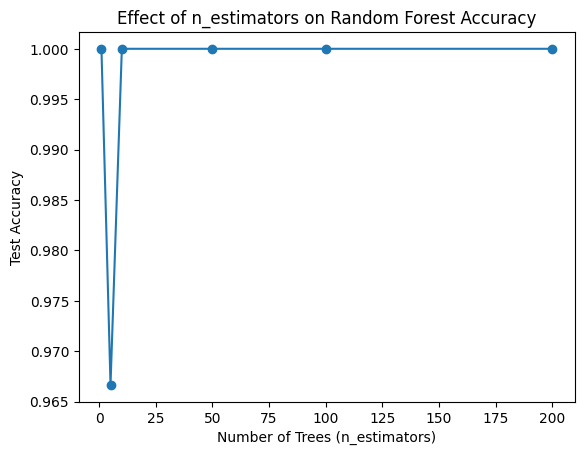

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators_range = [1, 5, 10, 50, 100, 200]
accuracies = []

for n in n_estimators_range:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"n_estimators={n}: Test accuracy = {acc:.4f}")

# Optional: Plot the results
plt.plot(n_estimators_range, accuracies, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Test Accuracy')
plt.title('Effect of n_estimators on Random Forest Accuracy')
plt.show()


**28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.**

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

# Load data
X, y = load_breast_cancer(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression needs feature scaling!
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Create Bagging Classifier with Logistic Regression as base estimator
bagging_clf = BaggingClassifier(
    estimator=logreg_pipe,    # use 'base_estimator' for scikit-learn < 1.2
    n_estimators=20,
    random_state=42
)

# Train
bagging_clf.fit(X_train, y_train)

# Predict probabilities
y_proba = bagging_clf.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute AUC score
auc = roc_auc_score(y_test, y_proba)
print(f"Bagging Classifier with Logistic Regression base estimator AUC score: {auc:.4f}")


Bagging Classifier with Logistic Regression base estimator AUC score: 0.9971


**29. Train a Random Forest Regressor and analyze feature importance scores.**

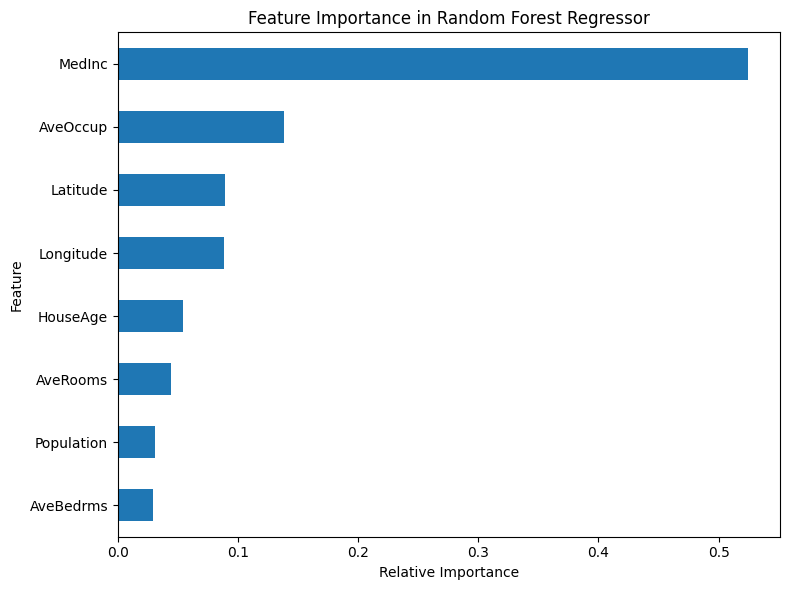

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = fetch_california_housing()
X, y = pd.DataFrame(data.data, columns=data.feature_names), data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
importances = rf.feature_importances_
feature_names = X.columns

# Create a Series for better visualization
importances_series = pd.Series(importances, index=feature_names).sort_values(ascending=True)

# Plot feature importance
plt.figure(figsize=(8, 6))
importances_series.plot(kind='barh')
plt.title('Feature Importance in Random Forest Regressor')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


**30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.**

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging Classifier with Decision Tree base estimator
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
bagging_acc = accuracy_score(y_test, y_pred_bag)

# Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=50,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

print(f"Bagging Classifier Accuracy:      {bagging_acc:.4f}")
print(f"Random Forest Classifier Accuracy: {rf_acc:.4f}")


Bagging Classifier Accuracy:      1.0000
Random Forest Classifier Accuracy: 1.0000


**31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.**

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize Random Forest and GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters from Grid Search:", grid_search.best_params_)
print(f"Test set accuracy: {accuracy:.4f}")


Best Hyperparameters from Grid Search: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Test set accuracy: 1.0000


**32. Train a Bagging Regressor with different numbers of base estimators and compare performance.**

n_estimators=1: Mean Squared Error = 0.5501
n_estimators=5: Mean Squared Error = 0.3060
n_estimators=10: Mean Squared Error = 0.2824
n_estimators=20: Mean Squared Error = 0.2643
n_estimators=50: Mean Squared Error = 0.2573
n_estimators=100: Mean Squared Error = 0.2559


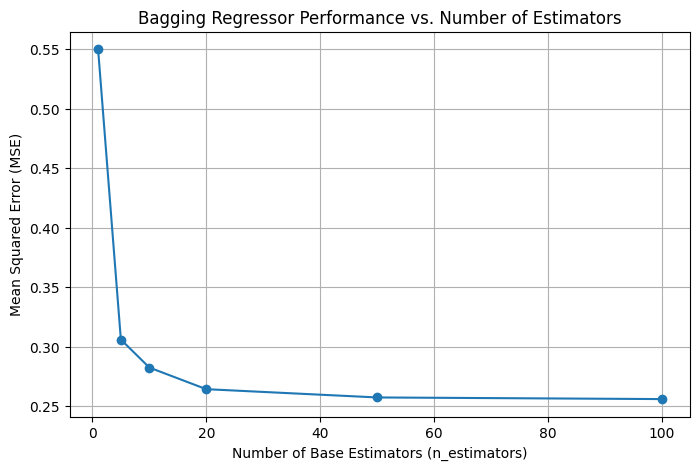

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of n_estimators to compare
n_estimators_range = [1, 5, 10, 20, 50, 100]
mse_scores = []

for n in n_estimators_range:
    bagging = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=n,
        random_state=42
    )
    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f'n_estimators={n}: Mean Squared Error = {mse:.4f}')

# Plot performance
plt.figure(figsize=(8,5))
plt.plot(n_estimators_range, mse_scores, marker='o')
plt.xlabel('Number of Base Estimators (n_estimators)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Bagging Regressor Performance vs. Number of Estimators')
plt.grid(True)
plt.show()


**33. Train a Random Forest Classifier and analyze misclassified samples.**

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load Iris data and split
iris = load_iris(as_frame=True)
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Find misclassified samples
misclassified = X_test[y_pred != y_test]
actual_labels = y_test[y_pred != y_test]
predicted_labels = y_pred[y_pred != y_test]

# Combine for analysis
misclassified_df = misclassified.copy()
misclassified_df['Actual'] = actual_labels.map(lambda idx: target_names[idx])
misclassified_df['Predicted'] = list(map(lambda idx: target_names[idx], predicted_labels))

print("Misclassified Samples in Test Set:")
print(misclassified_df)


Misclassified Samples in Test Set:
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), Actual, Predicted]
Index: []


**34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.**

In [15]:
from sklearn.datasets import load_wine  # You can use load_iris, load_wine, etc.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load a dataset
data = load_wine(as_frame=True)
X, y = data.data, data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

# 1. Train a single Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=22)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)
tree_acc = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Test Accuracy: {tree_acc:.3f}")

# 2. Train a Bagging Classifier (with Decision Trees as base estimators)
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=22),  # base_estimator for old scikit-learn
    n_estimators=10,
    random_state=22
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
bag_acc = accuracy_score(y_test, y_pred_bag)
print(f"Bagging Classifier Test Accuracy: {bag_acc:.3f}")


Decision Tree Test Accuracy: 0.822
Bagging Classifier Test Accuracy: 0.956


**35. Train a Random Forest Classifier and visualize the confusion matrix.**

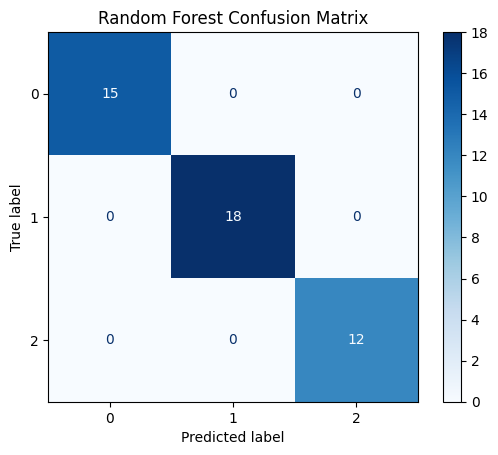

In [16]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset (you can switch to load_iris or any other)
data = load_wine(as_frame=True)
X, y = data.data, data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()


**36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.**

In [17]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load dataset
X, y = load_wine(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

# Create pipelines for models that require scaling (SVM, Logistic Regression)
svc_pipe = make_pipeline(StandardScaler(), SVC(probability=True, random_state=22))
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=22))

# Base estimators: Decision Tree, SVM, Logistic Regression
base_estimators = [
    ('dt', DecisionTreeClassifier(random_state=22)),
    ('svm', svc_pipe),
    ('lr', logreg_pipe)
]

# Meta-model (final estimator): Logistic Regression
stack_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(max_iter=1000, random_state=22),
    passthrough=False,  # Only use predictions of base estimators for meta-model
    cv=5
)

# Train and evaluate individual models
dt = DecisionTreeClassifier(random_state=22)
dt.fit(X_train, y_train)
dt_acc = accuracy_score(y_test, dt.predict(X_test))

svc_pipe.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svc_pipe.predict(X_test))

logreg_pipe.fit(X_train, y_train)
lr_acc = accuracy_score(y_test, logreg_pipe.predict(X_test))

# Train and evaluate stacking classifier
stack_clf.fit(X_train, y_train)
stack_acc = accuracy_score(y_test, stack_clf.predict(X_test))

print(f"Decision Tree Accuracy:        {dt_acc:.3f}")
print(f"SVM Accuracy:                  {svm_acc:.3f}")
print(f"Logistic Regression Accuracy:  {lr_acc:.3f}")
print(f"Stacking Classifier Accuracy:  {stack_acc:.3f}")


Decision Tree Accuracy:        0.822
SVM Accuracy:                  0.956
Logistic Regression Accuracy:  1.000
Stacking Classifier Accuracy:  1.000


**37. Train a Random Forest Classifier and print the top 5 most important features.**

In [18]:
from sklearn.datasets import load_wine  # Replace with your dataset if needed
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load data and split
data = load_wine(as_frame=True)
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Create DataFrame of feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
top5 = importances.sort_values(ascending=False).head(5)

print("Top 5 Most Important Features:")
print(top5)


Top 5 Most Important Features:
flavanoids                      0.197865
color_intensity                 0.184310
alcohol                         0.141665
proline                         0.137054
od280/od315_of_diluted_wines    0.097526
dtype: float64


**38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.**

In [19]:
from sklearn.datasets import load_wine  # You can use load_iris or others
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load dataset
data = load_wine(as_frame=True)
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

# Train the Bagging Classifier
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=22),
    n_estimators=10,
    random_state=22
)
bagging.fit(X_train, y_train)

# Predict test set labels
y_pred = bagging.predict(X_test)

# For multiclass, specify averaging method: 'macro', 'weighted', etc.
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Bagging Classifier Precision: {precision:.3f}")
print(f"Bagging Classifier Recall:    {recall:.3f}")
print(f"Bagging Classifier F1-score:  {f1:.3f}")

# Optional: full per-class breakdown
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Bagging Classifier Precision: 0.956
Bagging Classifier Recall:    0.956
Bagging Classifier F1-score:  0.956

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.94      0.94      0.94        17
           2       1.00      1.00      1.00        15

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



**39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.**

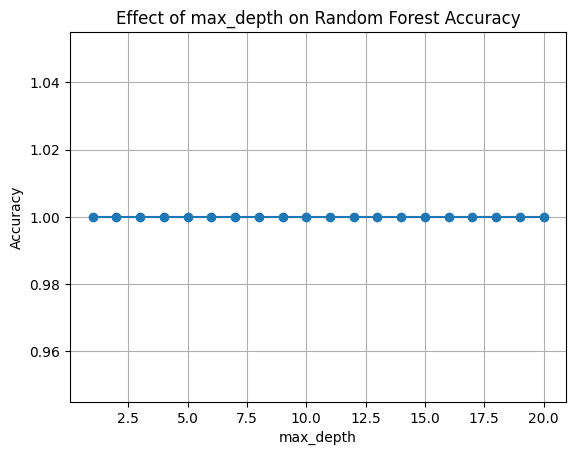

In [20]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load iris dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depth_values = list(range(1, 21))
accuracies = []
for depth in max_depth_values:
    rf = RandomForestClassifier(max_depth=depth, random_state=42, n_estimators=100)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(max_depth_values, accuracies, marker='o')
plt.title('Effect of max_depth on Random Forest Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


**40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.**

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging with Decision Tree
bagging_dt = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=10,
    random_state=42
)
bagging_dt.fit(X_train, y_train)
y_pred_dt = bagging_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Bagging Regressor (Decision Tree) MSE: {mse_dt:.3f}")

# Bagging with K-Neighbors
bagging_knn = BaggingRegressor(
    estimator=KNeighborsRegressor(),
    n_estimators=10,
    random_state=42
)
bagging_knn.fit(X_train, y_train)
y_pred_knn = bagging_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Bagging Regressor (K-Neighbors) MSE: {mse_knn:.3f}")


Bagging Regressor (Decision Tree) MSE: 0.282
Bagging Regressor (K-Neighbors) MSE: 1.097


**41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.**

In [22]:
from sklearn.datasets import load_wine  # Use your dataset if needed
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Load dataset
data = load_wine(as_frame=True)
X, y = data.data, data.target
n_classes = len(data.target_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# For multiclass, need to binarize the labels and use predict_proba
y_test_bin = label_binarize(y_test, classes=range(n_classes))
y_score = rf.predict_proba(X_test)

# Compute ROC-AUC (macro-averaged for multiclass)
auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
print(f"Random Forest Classifier ROC-AUC Score (macro-average): {auc:.3f}")


Random Forest Classifier ROC-AUC Score (macro-average): 1.000


**42. Train a Bagging Classifier and evaluate its performance using cross-validation.**

In [23]:
from sklearn.datasets import load_wine  # Use any classification dataset you prefer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Load dataset
X, y = load_wine(return_X_y=True)

# Define the Bagging Classifier with Decision Tree base estimator
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42
)

# Evaluate with 5-fold cross-validation
cv_scores = cross_val_score(bagging, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.3f}")


Cross-validation scores: [0.94444444 0.88888889 0.97222222 0.97142857 1.        ]
Mean CV accuracy: 0.955


**43. Train a Random Forest Classifier and plot the Precision-Recall curve.**

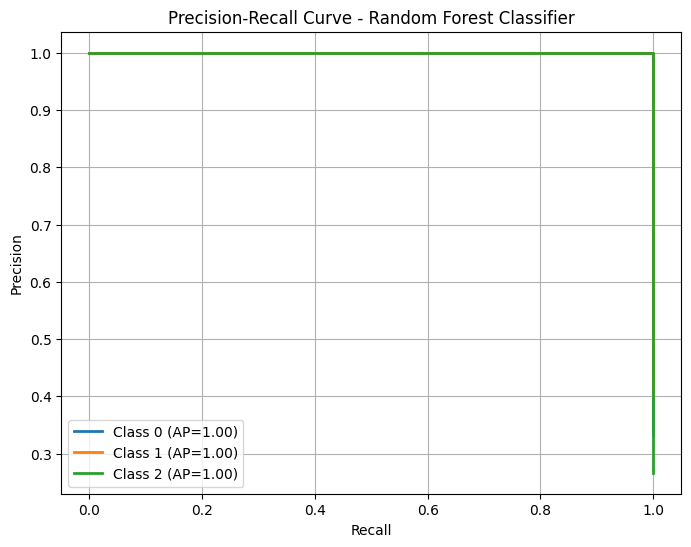

In [24]:
from sklearn.datasets import load_wine  # You can use any binary or multiclass dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = load_wine(as_frame=True)
X, y = data.data, data.target
n_classes = len(np.unique(y))

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_score = rf.predict_proba(X_test)

# Binarize the output for multiclass Precision-Recall
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    ap_score = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f"Class {i} (AP={ap_score:.2f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.show()


**44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.**

In [26]:
from sklearn.datasets import load_wine  # You can use any classification dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load dataset
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Individual base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Fit and evaluate single classifiers
rf.fit(X_train, y_train)
acc_rf = accuracy_score(y_test, rf.predict(X_test))

lr.fit(X_train, y_train)
acc_lr = accuracy_score(y_test, lr.predict(X_test))

# Stacking Classifier with RF and LR as base, LR as meta-classifier
stack = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('lr', LogisticRegression(max_iter=1000, random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    passthrough=False  # Only use predictions, not original features
)
stack.fit(X_train, y_train)
acc_stack = accuracy_score(y_test, stack.predict(X_test))

print(f"Random Forest accuracy:         {acc_rf:.3f}")
print(f"Logistic Regression accuracy:   {acc_lr:.3f}")
print(f"Stacking Classifier accuracy:   {acc_stack:.3f}")


Random Forest accuracy:         1.000
Logistic Regression accuracy:   1.000
Stacking Classifier accuracy:   1.000


**45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.**

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_samples_options = [0.5, 0.7, 0.9, 1.0]  # Different bootstrap sample proportions
mse_scores = []

for max_samples in max_samples_options:
    bagging = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=50,
        max_samples=max_samples,
        bootstrap=True,
        random_state=42
    )
    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"max_samples={max_samples}: Mean Squared Error = {mse:.4f}")

# Results table:
print("\nComparison of Bagging Regressor Performance:")
print("| max_samples |    MSE   |")
for m, e in zip(max_samples_options, mse_scores):
    print(f"|    {m:.2f}      |  {e:.4f} |")


max_samples=0.5: Mean Squared Error = 0.2664
max_samples=0.7: Mean Squared Error = 0.2638
max_samples=0.9: Mean Squared Error = 0.2613
max_samples=1.0: Mean Squared Error = 0.2573

Comparison of Bagging Regressor Performance:
| max_samples |    MSE   |
|    0.50      |  0.2664 |
|    0.70      |  0.2638 |
|    0.90      |  0.2613 |
|    1.00      |  0.2573 |
